In [88]:
#@title **3.1 Load required packages to run the simulation**
from OpenMiChroM.ChromDynamics import MiChroM

In [89]:
#3.2 Initialize MichroM
sim_chr10 = MiChroM(name="chr10", temperature=1.0, time_step=0.01)

    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.7 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

In [90]:
#3.3 Select the plataform to run the simulation and output folder
sim_chr10.setup(platform="cuda")
sim_chr10.saveFolder('output_chr10')

In [91]:
#3.4 Load the sequence of types for the beads
chr10 = sim_chr10.createSpringSpiral(ChromSeq='./chr10_beads.txt')

In [92]:
#3.5 Create random positions for each particle
sim_chr10.loadStructure(chr10, center=True)

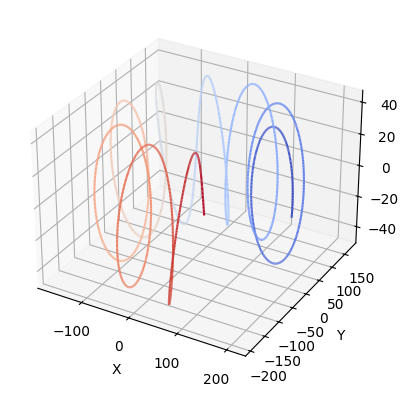

In [93]:
from auxiliar_functions import plot_traj
plot_traj(sim_chr10, beads=False, tube=True)

In [94]:
#3.6 Add homopolymer potentials
sim_chr10.addFENEBonds(kfb=30.0)
sim_chr10.addAngles(ka=2.0)
sim_chr10.addRepulsiveSoftCore(Ecut=4.0)

In [95]:
#3.7 Add a potential to colapse the chromosome
sim_chr10.addFlatBottomHarmonic()

In [96]:
#3.8 Add types interactions and ideal chromosome
sim_chr10.addTypetoType(mu=3.22, rc=1.78)
sim_chr10.addIdealChromosome(mu=3.22, rc=1.78, dinit=3, dend=500)

In [97]:
#3.9 Save one structure before colapse
sim_chr10.saveStructure(filename="chr10", mode="pdb")

In [98]:
#3.10 Run a first simulation to colapse the chromosome
print("Collapsing the chromosome...")
block = 3*10**2
n_blocks = 2*10**3

for _ in range(n_blocks):
    sim_chr10.runSimBlock(block, increment=False)
sim_chr10.saveStructure(filename="chr10", mode="pdb")

Collapsing the chromosome...
Number of exceptions: 2711
adding force  FENEBond 0
adding force  AngleForce 1
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 2
adding force  FlatBottomHarmonic 3
Add exclusions for TypetoType force
adding force  TypetoType 4
Add exclusions for IdealChromosome force
adding force  IdealChromosome 5
Positions... 
 loaded!
potential energy is 67.547600
bl=0 pos[1]=[208.7 -10.9 -1.6] dr=0.61 t=3.0ps kin=1.33 pot=68.03 Rg=146.803 SPS=14390 
bl=0 pos[1]=[207.0 -11.0 -0.2] dr=1.12 t=6.0ps kin=1.94 pot=67.33 Rg=145.940 SPS=12869 
bl=0 pos[1]=[205.0 -11.5 1.3] dr=1.50 t=9.0ps kin=2.43 pot=66.40 Rg=144.697 SPS=15145 
bl=0 pos[1]=[203.2 -11.9 3.0] dr=1.72 t=12.0ps kin=2.74 pot=65.40 Rg=143.203 SPS=14337 
bl=0 pos[1]=[200.7 -11.7 5.0] dr=1.86 t=15.0ps kin=3.00 pot=64.36 Rg=141.555 SPS=13898 
bl=0 pos[1]=[198.3 -11.3 6.0] dr=1.97 t=18.0ps kin=3.22 pot=63.22 Rg=139.788 SPS=15171 
bl=0 pos[1]=[196.8 -11.1 7.7] dr=2.02 t=21.0ps kin=3.32 pot=62.0

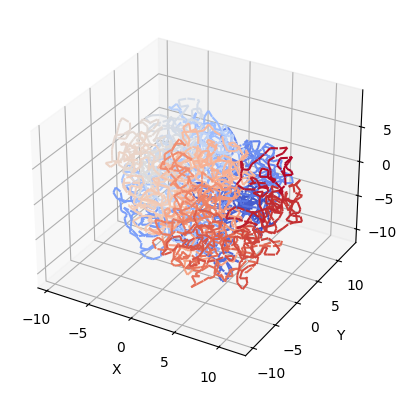

In [99]:
plot_traj(sim_chr10, beads=False, tube=True)

In [54]:
#3.11 Remove the potential that collapses the chromosome
sim_chr10.removeFlatBottomHarmonic()

Removed FlatBottomHarmonic from the system!


In [100]:
#3.12 Set the name for the file to store the structures of the simulation
sim_chr10.initStorage(filename="traj_chr10")

In [101]:
#3.13 Run the simulation
block = 5*10**2
n_blocks = 2*10**3

for _ in range(n_blocks):
    sim_chr10.runSimBlock(block, increment=True)
    sim_chr10.saveStructure()
sim_chr10.storage[0].close()

bl=1 pos[1]=[8.5 -3.6 -1.1] dr=0.95 t=6005.0ps kin=1.53 pot=19.74 Rg=7.719 SPS=8432 
bl=2 pos[1]=[8.6 -4.9 -0.5] dr=0.95 t=6010.0ps kin=1.47 pot=19.75 Rg=7.702 SPS=10468 
bl=3 pos[1]=[9.3 -4.7 -0.9] dr=0.93 t=6015.0ps kin=1.50 pot=19.75 Rg=7.699 SPS=10865 
bl=4 pos[1]=[9.7 -3.2 -0.6] dr=0.93 t=6020.0ps kin=1.48 pot=19.80 Rg=7.711 SPS=10750 
bl=5 pos[1]=[9.3 -4.1 0.4] dr=0.93 t=6025.0ps kin=1.53 pot=19.72 Rg=7.711 SPS=11246 
bl=6 pos[1]=[8.4 -5.6 0.6] dr=0.93 t=6030.0ps kin=1.51 pot=19.74 Rg=7.740 SPS=11460 
bl=7 pos[1]=[7.8 -6.1 0.5] dr=0.94 t=6035.0ps kin=1.46 pot=19.77 Rg=7.746 SPS=11657 
bl=8 pos[1]=[9.2 -5.5 0.4] dr=0.95 t=6040.0ps kin=1.48 pot=19.74 Rg=7.739 SPS=11044 
bl=9 pos[1]=[8.6 -4.3 0.8] dr=0.93 t=6045.0ps kin=1.55 pot=19.72 Rg=7.722 SPS=11272 
bl=10 pos[1]=[9.2 -4.6 0.2] dr=0.96 t=6050.0ps kin=1.50 pot=19.72 Rg=7.703 SPS=11645 
bl=11 pos[1]=[9.8 -3.0 0.6] dr=0.96 t=6055.0ps kin=1.47 pot=19.79 Rg=7.702 SPS=11353 
bl=12 pos[1]=[10.9 -3.3 2.3] dr=0.95 t=6060.0ps kin=1.49 pot

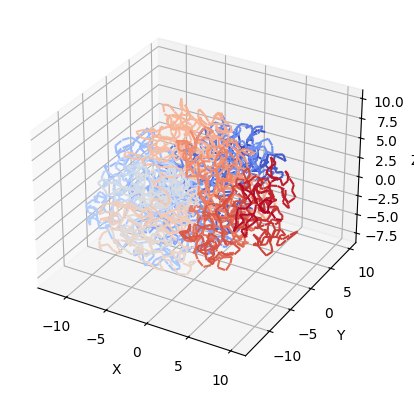

In [102]:
plot_traj(sim_chr10, beads=False, tube=True) #Last frame of simulation

In [103]:
#@title **4.1 Initialize cndbTools to analyze the simulation**
from OpenMiChroM.CndbTools import cndbTools
cndbTools = cndbTools()

In [104]:
#4.2 Load the structures from the simulation
chr10_traj = cndbTools.load('output_chr10/traj_chr10_0.cndb')

In [105]:
#4.3 Print information of the file
print(chr10_traj)

Cndb file has 2000 frames, with 2712 beads and {b'B1', b'A2', b'B3', b'B2', b'A1', b'NA'} types 


In [106]:
#4.4 Extract the XYZ positions of all the frames
chr10_xyz = cndbTools.xyz(frames=[1,2001,1], XYZ=[0,1,2])

Text(0.5, 0, 'Simulation Frame')

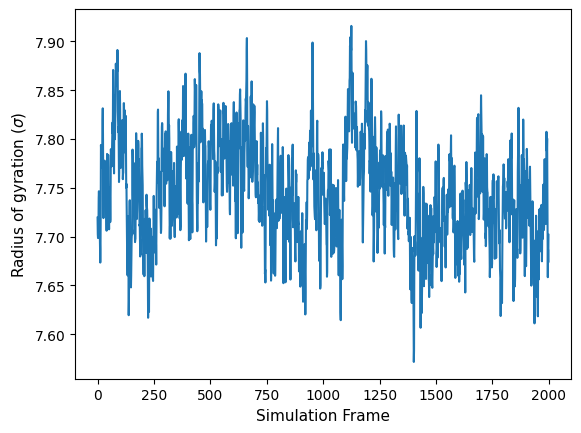

In [107]:
#4.5 Radius of gyration during the simulation
import matplotlib.pyplot as plt
import matplotlib as mpl

chr10_RG = cndbTools.compute_RG(chr10_xyz)
plt.plot(chr10_RG)
plt.ylabel(r'Radius of gyration ($\sigma$)',fontsize=11)
plt.xlabel(r'Simulation Frame',fontsize=11)

In [22]:
#4.6 Extract positions for each type of bead
chr10_A1 = cndbTools.xyz(frames=[1,2001,1], beadSelection=chr10_traj.dictChromSeq[b'A1'], XYZ=[0,1,2])
chr10_B1 = cndbTools.xyz(frames=[1,2001,1], beadSelection=chr10_traj.dictChromSeq[b'B1'], XYZ=[0,1,2])

Calculando RDP...


(0.025, 15.0)

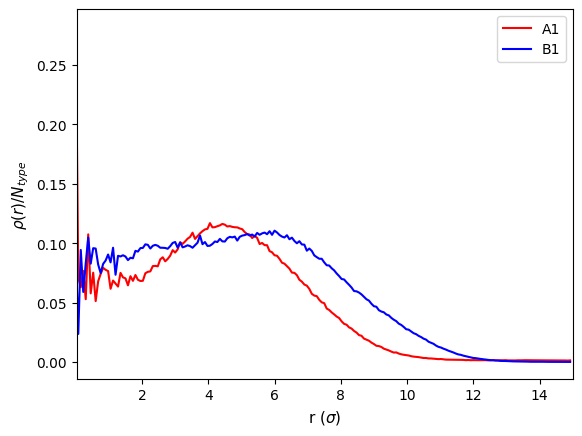

In [23]:
#4.7 Radial density of A1 and B1 beads
print("RDP...")
r_A1, RDP_chr10_A1 = cndbTools.compute_RDP(chr10_A1, radius=15.0, bins=200)
r_B1, RDP_chr10_B1 = cndbTools.compute_RDP(chr10_B1, radius=15.0, bins=200)
plt.plot(r_A1, RDP_chr10_A1, color='red', label='A1')
plt.plot(r_B1, RDP_chr10_B1, color='blue', label='B1')
plt.xlabel(r'r ($\sigma$)', fontsize=11,fontweight='normal', color='k')
plt.ylabel(r'$\rho(r)/N_{type}$', fontsize=11,fontweight='normal', color='k')
plt.legend()
plt.gca().set_xlim([5/200,15.0])

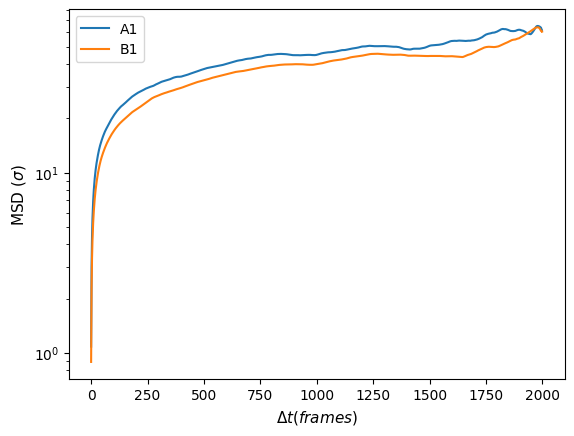

In [24]:
#4.8 Diffusivity of A1 and B1
import numpy as np
MSD_A1=np.mean(cndbTools.compute_MSD(chr10_A1),axis=0)[1:]
MSD_B1=np.mean(cndbTools.compute_MSD(chr10_B1),axis=0)[1:]
plt.plot(MSD_A1,label='A1')
plt.plot(MSD_B1,label='B1')
plt.ylabel(r'MSD ($\sigma$)', fontsize=11,fontweight='normal', color='k')
plt.xlabel(r'$\Delta t (frames)$', fontsize=11,fontweight='normal', color='k')
plt.yscale('log')
plt.legend()

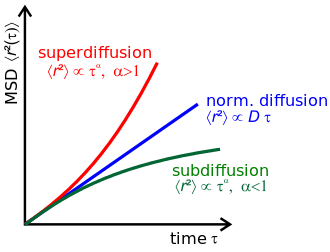

In [26]:
#4.9 Export trajectory files for VMD visualization

from OpenMiChroM.CndbTools import cndbTools
import mdtraj as md

chr=10
cndbTools = cndbTools()
# path_to_cndb='sim_CH12.LX/'
path_to_cndb='output_nucleus/'
path_to_xtc=path_to_cndb
#cndb_file_name='Chr_'+str(chr)+'.cndb'
cndb_file_name='traj_chr'+str(chr)+'_0'+'.cndb'
file_name=cndb_file_name.split('.cndb')[0]
chr_traj = cndbTools.load(path_to_cndb+cndb_file_name)
chr_xyz = cndbTools.xyz(XYZ=[0,1,2])
ChromSeq=chr_traj.ChromSeq

frame=1
Type_conversion = {b'A1': 'ASP',b'A2' : 'GLU',b'B1' : 'LYS',b'B2' : 'ARG',b'B3' : 'HIS',b'B4' : 'HIS',b'NA' : 'GLY'}
with open(path_to_xtc+file_name+'.pdb','w') as f:
    for i in range(len(chr_xyz[frame])):
        j=['' for _ in range(9)]
        j[0] = 'ATOM'.ljust(6)#atom#6s
        j[1] = str(i+1).rjust(5)#aomnum#5d
        j[2] = 'CA'.center(4)#atomname$#4s
        j[3] = Type_conversion[ChromSeq[i]].ljust(3)#resname#1s
        j[4] = 'A'.rjust(1) #Astring
        j[5] = str(i+1).rjust(4) #resnum
        j[6] = str('%8.3f' % (float(chr_xyz[frame][i][0]))).rjust(8) #x
        j[7] = str('%8.3f' % (float(chr_xyz[frame][i][1]))).rjust(8)#y
        j[8] = str('%8.3f' % (float(chr_xyz[frame][i][2]))).rjust(8) #z
        f.write("{}{} {} {} {}{}    {}{}{}\n".format(j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8]))
    f.write('END')

traj=md.load(path_to_xtc+file_name+'.pdb')
traj.xyz=chr_xyz
traj.time=np.linspace(0,len(chr_xyz),len(chr_xyz))
traj.save_xtc(path_to_xtc+file_name+'.xtc')